In [30]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fftpack

%matplotlib inline

# read audio file and plot it

44100


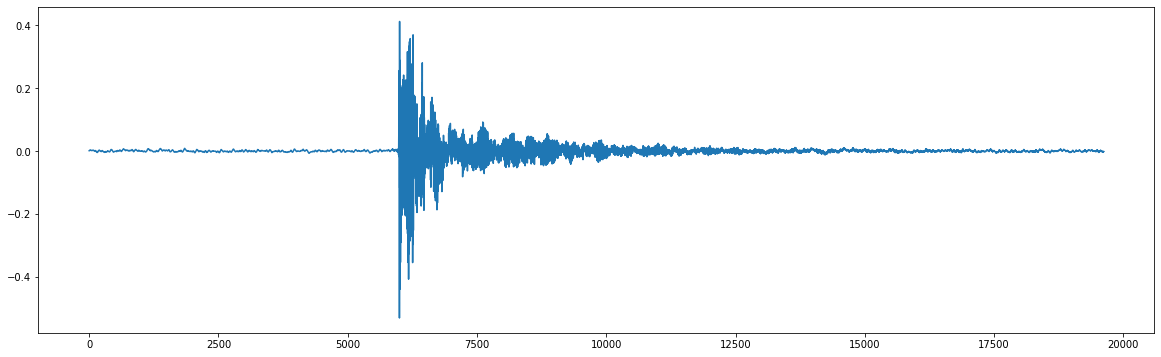

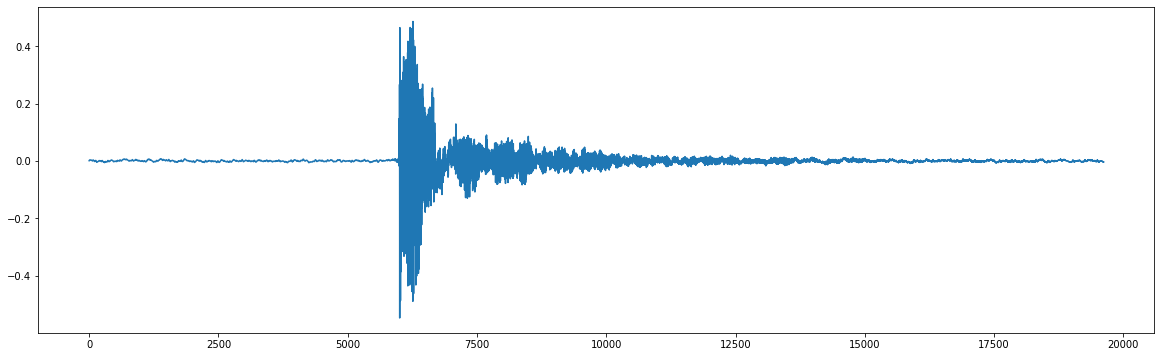

In [34]:
fsl, leftdata = wavfile.read("6ms-cam1.wav")

print(fsl)

plt.figure(figsize=(20,6))
plt.plot(leftdata[:,0])
plt.show()

plt.figure(figsize=(20,6))
plt.plot(leftdata[:,1])
plt.show()


44100


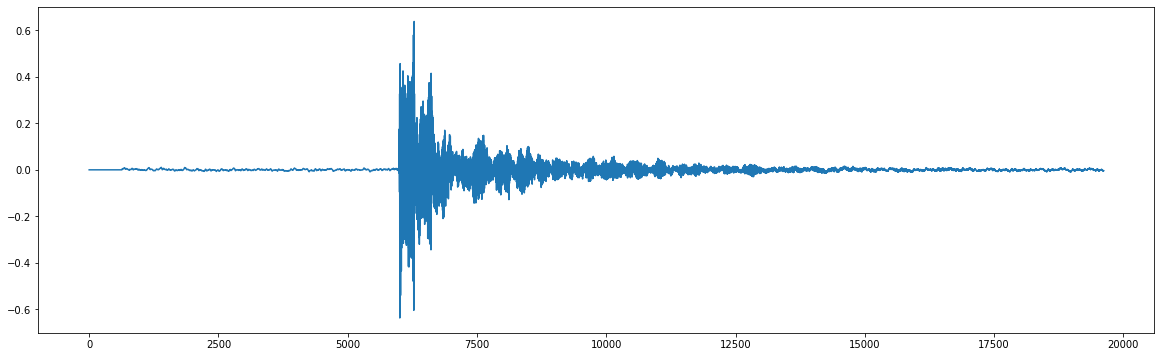

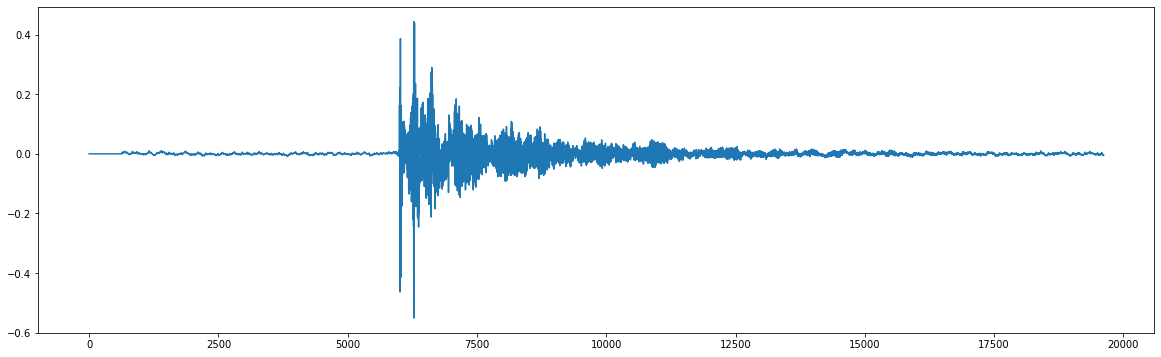

In [40]:
fsr, rightdata = wavfile.read("6ms-cam2.wav")

rightdata2 = np.copy(rightdata)
samples = 632
rightdata2[:,0] = np.roll(rightdata[:,0], samples)
rightdata2[:,1] = np.roll(rightdata[:,1], samples)
rightdata2[:samples,0] = 0
rightdata2[:samples,1] = 0

print(fsr)


plt.figure(figsize=(20,6))
plt.plot(rightdata2[:,0])
plt.show()

plt.figure(figsize=(20,6))
plt.plot(rightdata2[:,1])
plt.show()

22.05
tdoa_samples 5
corresponds to distance of 3.888888888888889 in cm
time difference of arrival is (in secs):  0.00011337868480725624
[ 5  0  4 10 12  7  2  9  3  8]
[11.581357  10.465542   9.350736   9.276596   8.777912   8.736502
  8.677423   8.627438   3.2921572  3.0516784]


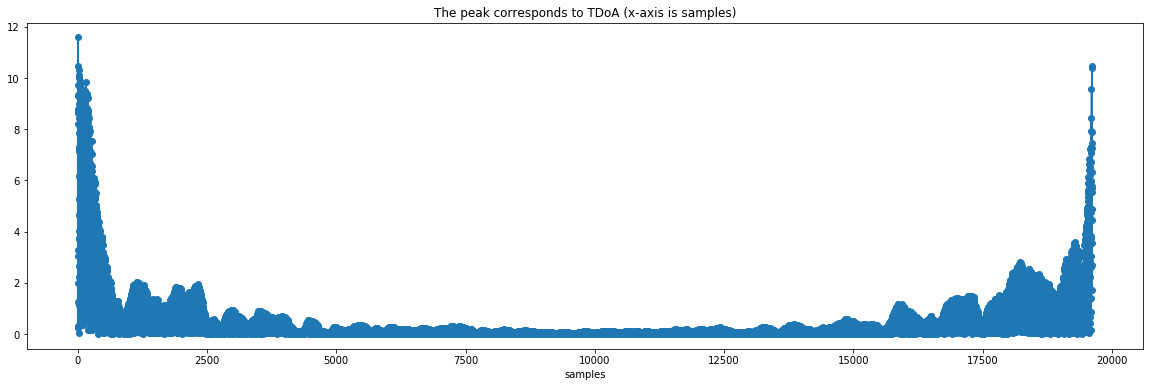

In [68]:
# leftdata: convolution b/w the two channels
A = fftpack.fft(leftdata[:,0])
B = fftpack.fft(leftdata[:,1])
Ar = -A.conjugate()
Br = -B.conjugate()

lifft = np.abs(fftpack.ifft(Ar*B))
print(0.0005*fsl)
tdoa_samples = np.argmax(lifft[:13])
print('tdoa_samples', tdoa_samples)
print('corresponds to distance of {} in cm'.format((tdoa_samples*34300/fsl)))
print('time difference of arrival is (in secs): ',tdoa_samples/fsl)

print(lifft[:13].argsort()[-10:][::-1])
print(lifft[lifft[:13].argsort()[-10:][::-1]])


plt.figure(figsize=(20,6))
plt.plot(np.abs(fftpack.ifft(Ar*B)), 'o-')
plt.title('The peak corresponds to TDoA (x-axis is samples)')
plt.xlabel('samples')
plt.show()

In [66]:
m1 = np.array([[-3.7],[0],[0]]) #cm
m2 = np.array([[3.7],[0],[0]]) #cm
m3 =  np.array([[-3.7],[-6.8],[0]]) #cm
m4 = np.array([[3.7],[-6.8],[0]])
# x=84.5cm
#y=104.2+0.7cm
#z=49cm-2.8
sourcePos = np.array([[-84.5],[104.2+0.7],[49-2.8]])

d12 = np.linalg.norm(sourcePos-m2) - np.linalg.norm(sourcePos-m1)
d13 = np.linalg.norm(sourcePos-m3) - np.linalg.norm(sourcePos-m1)
d14 = np.linalg.norm(sourcePos-m4) - np.linalg.norm(sourcePos-m1)
d23 = np.linalg.norm(sourcePos-m3) - np.linalg.norm(sourcePos-m2)
d24 = np.linalg.norm(sourcePos-m4) - np.linalg.norm(sourcePos-m2)
d34 = np.linalg.norm(sourcePos-m4) - np.linalg.norm(sourcePos-m3)
print(d12, d13, d14, d23, d24, d34)

4.390089699832458 5.156505331188583 9.395386284110174 0.766415631356125 5.0052965842777155 4.2388809529215905


In [62]:
yaw_angles = np.arange(0,360,1)*(np.pi/180) # radians, 
pitch_angles = np.arange(-90,91,1)*(np.pi/180) # radians
m1 = np.array([[-3.7],[0],[0]]) #cm
m3 =  np.array([[-3.7],[-6.8],[0]]) #cm
m2 = np.array([[3.7],[0],[0]]) #cm
m4 = np.array([[3.7],[-6.8],[0]])
dist = 200 #cm
mind = 10000000
for pitch in pitch_angles:
    for yaw in yaw_angles:
        proj = dist*np.cos(pitch)
        x = proj * np.sin(yaw)
        y = proj * np.cos(yaw)
        z = dist * np.sin(pitch)
        sourcePos = np.array([[x],[y],[z]])
        d12 = np.linalg.norm(sourcePos-m2) - np.linalg.norm(sourcePos-m1)
        d13 = np.linalg.norm(sourcePos-m3) - np.linalg.norm(sourcePos-m1)
        d14 = np.linalg.norm(sourcePos-m4) - np.linalg.norm(sourcePos-m1)
        d23 = np.linalg.norm(sourcePos-m3) - np.linalg.norm(sourcePos-m2)
        d24 = np.linalg.norm(sourcePos-m4) - np.linalg.norm(sourcePos-m2)
        d34 = np.linalg.norm(sourcePos-m4) - np.linalg.norm(sourcePos-m3)
        values = np.array([d12, d13, d14, d23, d24, d34])
        absvalues = np.abs(values)
        local_dmin = np.min(absvalues)
        if local_dmin < mind and local_dmin > 1:
            print(sourcePos.T)
            print(absvalues)
            print(local_dmin)
            mind = local_dmin
print(mind)

[[  55.54852695   27.09282684 -190.21130326]]
[2.05497098 1.02866361 1.01574001 3.0836346  1.03923097 2.04440363]
1.0157400118253292
[[ -55.54852695   27.09282684 -190.21130326]]
[2.05497098 1.03923097 3.0836346  1.01574001 1.02866361 2.04440363]
1.0157400118253008
[[  27.5182095    59.01299072 -189.10371512]]
[1.01800286 2.1052502  1.0978762  3.12325306 2.11587905 1.007374  ]
1.0073740016742647
[[  70.82453288  -33.02602207 -184.10097069]]
[2.62011559 1.00307959 3.6364883  1.617036   1.01637271 2.63340871]
1.0030795891793503
[[  77.80443222  -33.02602207 -181.26155741]]
[2.87834599 1.00243797 3.89538746 1.87590802 1.01704148 2.8929495 ]
1.0024379684175813
[[  27.09282684  -83.38314714 -179.75880926]]
[1.00226624 2.73076866 3.74694258 1.72850242 2.74467634 1.01617392]
1.002266240713766
[[ -27.09282684  -83.38314714 -179.75880926]]
[1.00226624 2.74467634 1.72850242 3.74694258 2.73076866 1.01617392]
1.0022662407137375
[[  77.43723567  -58.35314257 -174.92394143]]
[2.86476099 1.86347108 4

samples_to_consider 14
tdoa_samples 4
time difference of arrival is (in secs):  9.070294784580499e-05
[ 4  9  2  1 11 12  7]
[9.07029478e-05 2.04081633e-04 4.53514739e-05 2.26757370e-05
 2.49433107e-04 2.72108844e-04 1.58730159e-04]
[0.86898243 0.8116189  0.7462142  0.67023396 0.6589408  0.51928526
 0.48305222]


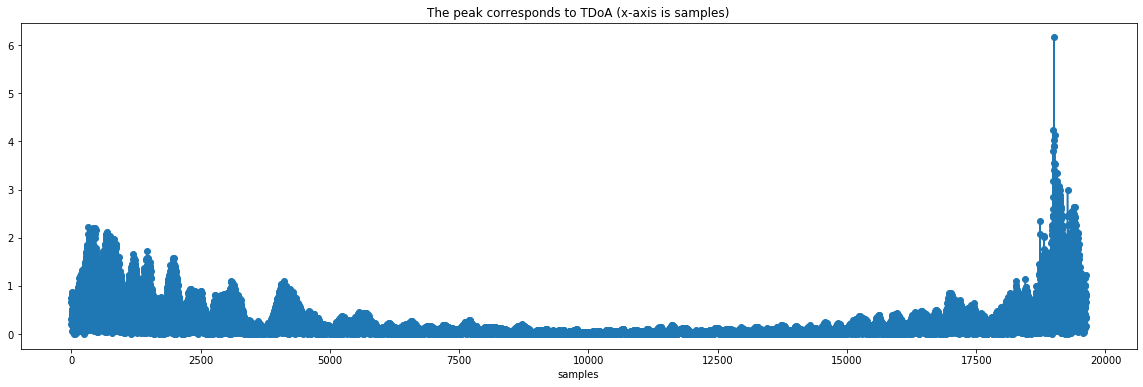

In [45]:
# rightdata: convolution b/w the two channels
A = fftpack.fft(leftdata[:,0])
B = fftpack.fft(rightdata[:,1])
Ar = -A.conjugate()
Br = -B.conjugate()

samples_to_consider = 14 #int(0.0005*fsr)
top_x = 7

print('samples_to_consider', samples_to_consider)
rifft = np.abs(fftpack.ifft(Ar*B))
tdoa_samples = np.argmax(rifft[:samples_to_consider])
print('tdoa_samples', tdoa_samples)
print('time difference of arrival is (in secs): ',tdoa_samples/fsr)

print(rifft[:samples_to_consider].argsort()[-top_x:][::-1])

print(rifft[:samples_to_consider].argsort()[-top_x:][::-1]/fsr)
print(rifft[rifft[:samples_to_consider].argsort()[-top_x:][::-1]])


plt.figure(figsize=(20,6))
plt.plot(np.abs(fftpack.ifft(Ar*B)), 'o-')
plt.title('The peak corresponds to TDoA (x-axis is samples)')
plt.xlabel('samples')
plt.show()

## 8.742856752
## 6.629792463 samples

samples_to_consider 22
tdoa_samples 6
time difference of arrival is (in secs):  0.00013605442176870748
[ 6  7 18  5 17 19  8]
[0.00013605 0.00015873 0.00040816 0.00011338 0.00038549 0.00043084
 0.00018141]
[3.46090822e+08 3.41257364e+08 3.31403344e+08 3.26572494e+08
 3.22278798e+08 3.14222572e+08 3.10549336e+08]


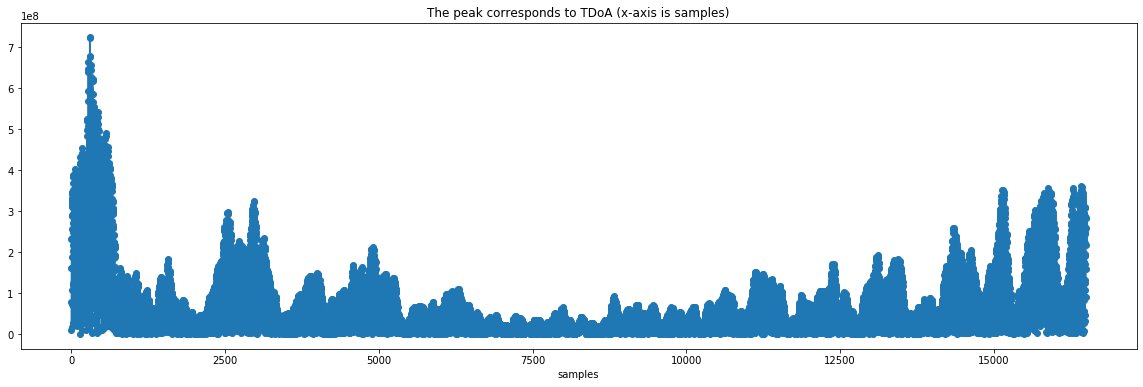

In [26]:
# rightdata: convolution b/w the two channels
data1=leftdata[:,0]
data2=rightdata[:,0]
A = fftpack.fft(data2)
B = fftpack.fft(data1)
Ar = -A.conjugate()
Br = -B.conjugate()

samples_to_consider = int(0.0005*fsr)
top_x = 7

print('samples_to_consider', samples_to_consider)
rifft = np.abs(fftpack.ifft(Ar*B))
tdoa_samples = np.argmax(rifft[:samples_to_consider])

print('tdoa_samples', tdoa_samples)
print('time difference of arrival is (in secs): ',tdoa_samples/fsr)

print(rifft[:samples_to_consider].argsort()[-top_x:][::-1])

print(rifft[:samples_to_consider].argsort()[-top_x:][::-1]/fsr)
print(rifft[rifft[:samples_to_consider].argsort()[-top_x:][::-1]])


plt.figure(figsize=(20,6))
plt.plot(np.abs(fftpack.ifft(Ar*B)), 'o-')
plt.title('The peak corresponds to TDoA (x-axis is samples)')
plt.xlabel('samples')
plt.show()

In [70]:
def tdoa(signal1, signal2, fs):
    """
    Find out how much signal2 is shifted to the right
    wrt. signal1 in units of seconds
    fs: in Hz
    """
    # convolution b/w two signals
    A = fftpack.fft(signal1)
    B = fftpack.fft(signal2)
    Ar = -A.conjugate()
    Br = -B.conjugate()

    ifft = np.abs(fftpack.ifft(Ar*B))
    tdoa_samples = np.argmax(ifft[:14])
    print('tdoa_samples', tdoa_samples)
    print('corresponds to distance of {} in cm'.format((tdoa_samples*34300/fs)))
    print('time difference of arrival is (in secs): ', tdoa_samples/fs)

    print(ifft[:14].argsort()[-7:][::-1])
    return tdoa_samples/fs

In [71]:
signal1=leftdata[:,0]
signal2=leftdata[:,1]
signal3=rightdata[:,0]
signal4=rightdata[:,1]


delTau12 = tdoa(signal1, signal2, fsl)  # 21
print('\n')
delTau13 = -tdoa(signal1, signal3, fsl)  # 31
print('\n')
delTau14 = tdoa(signal4, signal1, fsl)  # 41
print('\n')
delTau23 = -tdoa(signal2, signal3, fsl)  # 23
print('\n')
delTau24 = -tdoa(signal2, signal4, fsl)  # 42
print('\n')
delTau34 = tdoa(signal4, signal3, fsl)  # 43
print('\n')


tdoa_samples 0
corresponds to distance of 0.0 in cm
time difference of arrival is (in secs):  0.0
[ 0  5 10  3  8  1 13]


tdoa_samples 9
corresponds to distance of 7.0 in cm
time difference of arrival is (in secs):  0.00020408163265306123
[ 9  4  2  7 12  0 11]


tdoa_samples 6
corresponds to distance of 4.666666666666667 in cm
time difference of arrival is (in secs):  0.00013605442176870748
[ 6 11  1  5  8 13  3]


tdoa_samples 2
corresponds to distance of 1.5555555555555556 in cm
time difference of arrival is (in secs):  4.5351473922902495e-05
[ 2  7 12  9  0  4  5]


tdoa_samples 9
corresponds to distance of 7.0 in cm
time difference of arrival is (in secs):  0.00020408163265306123
[ 9  4  2 11  7 12  6]


tdoa_samples 10
corresponds to distance of 7.777777777777778 in cm
time difference of arrival is (in secs):  0.00022675736961451248
[10  5  0 11  9  6  4]




# Find Direction of Arrival

In [56]:
from scipy.optimize import least_squares

# l1 is separation b/w microphones in the x-direction
# l2 is separation b/w (row) of microphones in y-direction
# (see diagram)
l1 = 0.075 # meters
l2 = 0.075 # meters

"""
Microphone array setup
  [m1]<------l1------>[m2]
   |                   |
   l2                  l2
   |                   |
  [m3]<------l1------>[m4]
  
  Origin is located at the center of the array (ie. m2 has coord. (l1/2,l2/2,0))
"""

speedOfSound = 340 # m/s at 20 degree celsius in air

def calculateAngles(xhat, yhat, zhat):
    alpha = np.arctan2(yhat, xhat)*180/np.pi
    xy_projection = np.linalg.norm(np.array([xhat,yhat]))
    beta = np.arctan2(zhat, xy_projection)*180/np.pi
    return alpha, beta

def fun_tdoa(x, miloc, mjloc, delD):
    sourceloc = x
    term1 = (np.linalg.norm(sourceloc-mjloc[0])-np.linalg.norm(sourceloc-miloc[0])) - delD[0]
    term2 = (np.linalg.norm(sourceloc-mjloc[1])-np.linalg.norm(sourceloc-miloc[1])) - delD[1]
    term3 = (np.linalg.norm(sourceloc-mjloc[2])-np.linalg.norm(sourceloc-miloc[2])) - delD[2]
    term4 = (np.linalg.norm(sourceloc-mjloc[3])-np.linalg.norm(sourceloc-miloc[3])) - delD[3]
    term5 = (np.linalg.norm(sourceloc-mjloc[4])-np.linalg.norm(sourceloc-miloc[4])) - delD[4]
    term6 = (np.linalg.norm(sourceloc-mjloc[5])-np.linalg.norm(sourceloc-miloc[5])) - delD[5]
    return (term1, term2, term3, term4, term5, term6)


def localizeSource(tdoas, l1, l2, speed_of_sound):
    assert l1 < 1, 'you really have 1 meter gap b/w front two microphones?'
    assert l2 < 1, 'you really have 1 meter gap b/w two side microphones?'
    assert speed_of_sound < 2000, 'your speed of sound seems too high.'
    assert len(tdoas) is 6, 'you didnt give exactly tdoas for all 6 microphone pairs'
    
    # distance difference of arrivel = tdoa * speed of sound 
    distdoa = tdoas * speed_of_sound
    
    # initial guess (for nonlinear least squares below)
    x0_tdoa = np.array([1, 1, .015])
    # mic1, mic1, mic1,
    # mic2, mic2, mic3
    miloc = np.array([[-l1/2,l2/2,0],[-l1/2,l2/2,0],[-l1/2,l2/2,0],
                      [l1/2,l2/2,0],[l1/2,l2/2,0],[-l1/2,-l2/2,0]])
    # mic2, mic3, mic4,
    # mic3, mic4, mic4
    mjloc = np.array([[l1/2,l2/2,0],[-l1/2,-l2/2,0],[l1/2,-l2/2,0],
                      [-l1/2,-l2/2,0],[l1/2,-l2/2,0],[l1/2,-l2/2,0]])
    
    # find estimate of source location using nonlinear least squares
    res_1 = least_squares(fun_tdoa, x0_tdoa, method='trf', bounds=(0.01,10),
                          args=(miloc, mjloc, distdoa))
    #print(res_1)
    xhat, yhat, zhat = res_1.x
    return xhat, yhat, zhat

In [57]:
tdoas = np.array([delTau12, delTau13, delTau14, delTau23, delTau24, delTau34])
print(tdoas)
xhat, yhat, zhat = localizeSource(tdoas, l1, l2, speedOfSound)
print('\nNOTE: all coordinates below are in centimeters')
print('\nEstimated position of the source (xhat, yhat, zhat) is')
print('({}, {}, {})'.format(xhat*100, yhat*100, zhat*100))


alpha, beta = calculateAngles(xhat, yhat, zhat)
print('alpha={} degrees'.format(alpha))
print('beta={} degrees'.format(beta))

[ 4.53514739e-05 -1.36054422e-04  1.81405896e-04 -2.04081633e-04
 -1.13378685e-04  6.80272109e-05]

NOTE: all coordinates below are in centimeters

Estimated position of the source (xhat, yhat, zhat) is
(1.0000000000000897, 1.000000369966507, 999.9999998095941)
alpha=45.000010598755175 degrees
beta=89.91897157056046 degrees
